In [1002]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [1003]:
data = pd.read_csv("M1_final.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [1004]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [1005]:
data.tail()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13
28819,1,31,5,B6,N958JB,BQN,-1,225,1576,1439,...,38,96,N,6,0,30.18,Cloudy,19,23,15


In [1006]:
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


As we can see the dataset contains dates and time as well as flight information and the conditions experienced in the flight. Before we conduct any kind of analysis it would be interesting to explore the data to better understand the variables and their potential relationships. Some interesting areas to explore could be, which operating carrier was most often delayed, did weather such as temperature affect delays, were there particular destinations that were more often late, did wind conditions affect taxi_out time?

Text(0, 0.5, 'Number of flights')

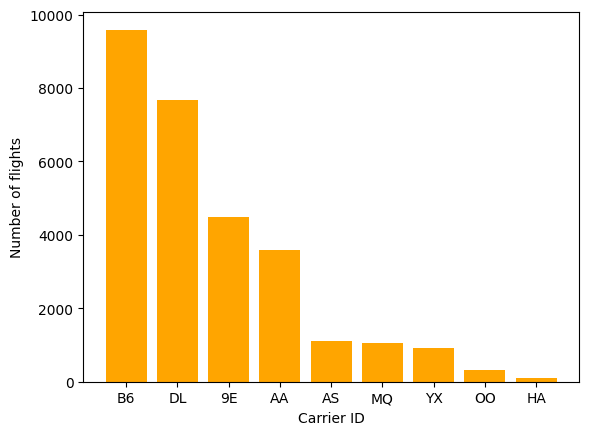

In [1007]:
carrier_totals = data["OP_UNIQUE_CARRIER"].value_counts() 
carrier_totals = pd.DataFrame(carrier_totals).reset_index()
plt.bar(x = carrier_totals["OP_UNIQUE_CARRIER"], height = carrier_totals["count"], color = "orange")
plt.xlabel("Carrier ID")
plt.ylabel("Number of flights")

In [1008]:
by_carrier = data.groupby(["OP_UNIQUE_CARRIER"]).sum(numeric_only=True).reset_index() 
by_carrier



,OP_UNIQUE_CARRIER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,9E,34883,70456,17772,24106,522579,1816881,3909866,3906612,4405625,187682,255144,56272,25208,134995.20,144064,131732,95012
1,AA,27927,57093,14403,19594,991696,5812649,2857969,2860283,2988485,147961,207946,44125,19599,108167.34,102875,100557,73892
2,AS,8884,17891,4488,5670,441206,2774654,803005,808675,1044231,46126,64191,13568,6245,33436.74,35427,30406,28371
3,B6,76720,154985,38658,77757,2200820,12970610,8052007,7955524,7914267,394057,559588,118100,52369,288516.20,277988,269892,187557
4,DL,59485,123517,30681,41957,2004865,11712721,6240312,6273629,7534477,318939,443617,94904,42775,231169.17,262406,215782,166009
5,HA,709,1427,362,68,61080,448470,54000,54068,87960,3870,4999,1188,599,2708.79,2936,1655,1811
6,MQ,8724,16425,4202,5803,119743,444395,967093,965696,1074176,44398,58709,13354,6391,31425.48,32400,33432,22230
7,OO,3467,4496,1212,5175,44092,177939,271684,271099,304616,13712,17978,4073,1942,9345.52,9840,9163,6421
8,YX,6713,15438,3760,3597,106725,378123,793595,794312,897560,38992,51682,10851,4400,27499.48,28114,26795,19841


In [1009]:
carrier_count = data.groupby(["OP_UNIQUE_CARRIER"]).size()
carrier_count = pd.DataFrame(carrier_count).reset_index()
carrier_count["Total_Delay"] = by_carrier["DEP_DELAY"]
carrier_count.columns.values[1] = "Total_Flights"
carrier_count["AVG_DELAY"] = carrier_count["Total_Delay"]/ carrier_count["Total_Flights"]
carrier_count


,OP_UNIQUE_CARRIER,Total_Flights,Total_Delay,AVG_DELAY
0,9E,4485,24106,5.374805
1,AA,3595,19594,5.450348
2,AS,1111,5670,5.103510
3,B6,9589,77757,8.108979
4,DL,7680,41957,5.463151
5,HA,90,68,0.755556
6,MQ,1045,5803,5.553110
7,OO,311,5175,16.639871
8,YX,914,3597,3.935449


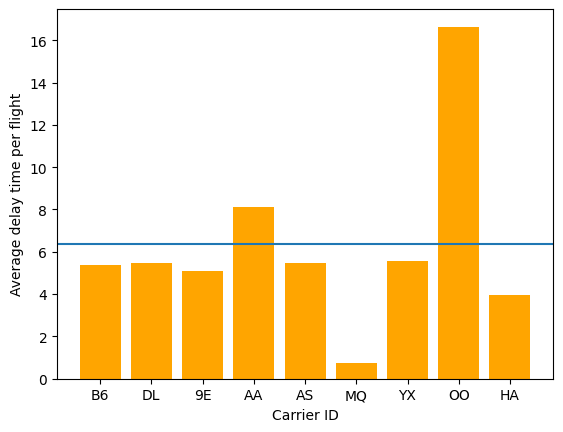

In [1010]:
plt.bar(x = carrier_totals["OP_UNIQUE_CARRIER"], height = carrier_count["AVG_DELAY"], color = "orange")
plt.xlabel("Carrier ID")
plt.ylabel("Average delay time per flight")
plt.axhline(y = data["DEP_DELAY"].mean())

In [1011]:
data["Condition"].unique()

array(['Fair / Windy', 'Fair', 'Light Rain / Windy', 'Partly Cloudy',
       'Mostly Cloudy', 'Cloudy', 'Light Rain', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Light Snow / Windy', 'Cloudy / Windy',
       'Light Drizzle', 'Rain', 'Heavy Rain', 'Fog', 'Wintry Mix',
       'Light Freezing Rain', 'Light Snow', 'Wintry Mix / Windy',
       'Fog / Windy', 'Light Drizzle / Windy', 'Rain / Windy',
       'Drizzle and Fog', 'Snow', 'Heavy Rain / Windy'], dtype=object)

In [1012]:
data["DEST"].unique()

array(['CHS', 'LAX', 'FLL', 'MCO', 'ATL', 'ORD', 'BUF', 'LGB', 'LAS',
       'DCA', 'PHX', 'SFO', 'SJU', 'SLC', 'BOS', 'SAV', 'SYR', 'MSP',
       'SEA', 'MIA', 'PDX', 'TPA', 'BTV', 'IAH', 'DEN', 'RSW', 'ORF',
       'JAX', 'MSY', 'CLT', 'BNA', 'RDU', 'SAN', 'SJC', 'ROC', 'DFW',
       'IAD', 'AUS', 'DTW', 'PWM', 'SRQ', 'CMH', 'HNL', 'PBI', 'BWI',
       'CLE', 'BUR', 'PIT', 'RIC', 'IND', 'CVG', 'SMF', 'ONT', 'SAT',
       'PSP', 'OAK', 'ABQ', 'PSE', 'ORH', 'BQN', 'STT', 'RNO', 'PHL',
       'EGE', 'JAC'], dtype=object)

Text(0, 0.5, 'Total number of flights')

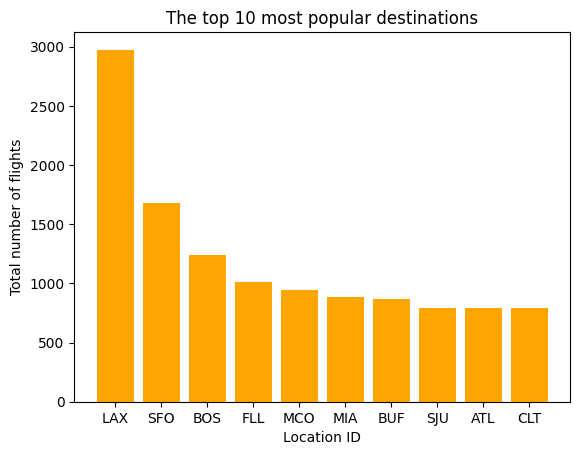

In [1013]:
dest_grouped = data.groupby(["DEST"]).size()
dest_grouped = pd.DataFrame(dest_grouped).reset_index()
sorted_dest = dest_grouped.sort_values(0, ascending= 0)
sorted_dest = sorted_dest.iloc[0:10, :]
sorted_dest
plt.bar(x = sorted_dest["DEST"], height = sorted_dest[0], color = "orange")
plt.title("The top 10 most popular destinations")
plt.xlabel("Location ID")
plt.ylabel("Total number of flights")


In [1014]:
dest_grouped = data.groupby(["DEST"]).sum(numeric_only=True)
dest_delay_grouped = dest_grouped["DEP_DELAY"]
dest_delay_grouped = pd.DataFrame(dest_delay_grouped).reset_index()
sorted_list = sorted_dest.iloc[:, 0].tolist()

dest_delay_grouped.index = dest_delay_grouped.iloc[:, 0]
dest_delay_grouped.drop(columns="DEST")
dest_delay_grouped.set_index(['DEST', 'DEP_DELAY'],inplace=True)
dest_delay_grouped = dest_delay_grouped.transpose()
dest_delay_grouped = dest_delay_grouped[sorted_list].transpose()
dest_delay_grouped= dest_delay_grouped.reset_index()
dest_delay_grouped


,DEST,DEP_DELAY
0,LAX,6512
1,SFO,10263
2,BOS,13097
3,FLL,9569
4,MCO,5831
5,MIA,6131
6,BUF,8111
7,SJU,6477
8,ATL,5347
9,CLT,3297


In [1015]:

sorted_dest.columns.values[1] = "Total_Num_Flights"
sorted_dest = sorted_dest.reset_index()
sorted_dest = sorted_dest.drop(columns="index")
sorted_dest


,DEST,Total_Num_Flights
0,LAX,2974
1,SFO,1678
2,BOS,1243
3,FLL,1008
4,MCO,947
5,MIA,881
6,BUF,869
7,SJU,796
8,ATL,795
9,CLT,792


In [1016]:
dest_delay_data = pd.concat([dest_delay_grouped, sorted_dest], axis = 1)
dest_delay_data = dest_delay_data[["DEST", "DEP_DELAY", "Total_Num_Flights"]]
dest_delay_data = dest_delay_data.iloc[: , 1:]
dest_delay_data["AVG_DELAY"] = dest_delay_data["DEP_DELAY"]/ dest_delay_data["Total_Num_Flights"]
dest_delay_data

,DEST,DEP_DELAY,Total_Num_Flights,AVG_DELAY
0,LAX,6512,2974,2.189644
1,SFO,10263,1678,6.116210
2,BOS,13097,1243,10.536605
3,FLL,9569,1008,9.493056
4,MCO,5831,947,6.157339
5,MIA,6131,881,6.959137
6,BUF,8111,869,9.333717
7,SJU,6477,796,8.136935
8,ATL,5347,795,6.725786
9,CLT,3297,792,4.162879


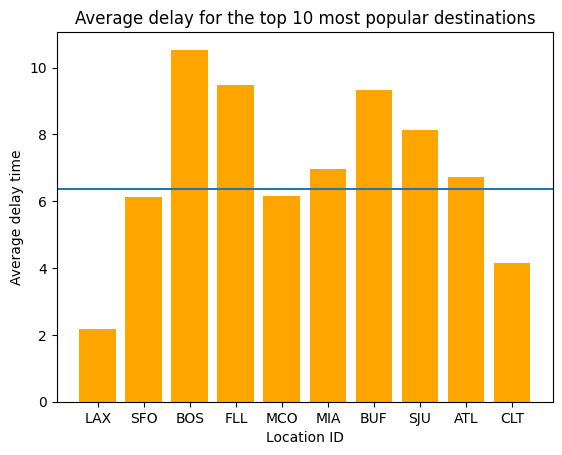

In [1017]:
plt.bar(x = dest_delay_data["DEST"], height= dest_delay_data["AVG_DELAY"], color = "orange")
plt.title("Average delay for the top 10 most popular destinations")
plt.xlabel("Location ID")
plt.ylabel("Average delay time")
plt.axhline(y = data["DEP_DELAY"].mean())

<function matplotlib.pyplot.show(close=None, block=None)>

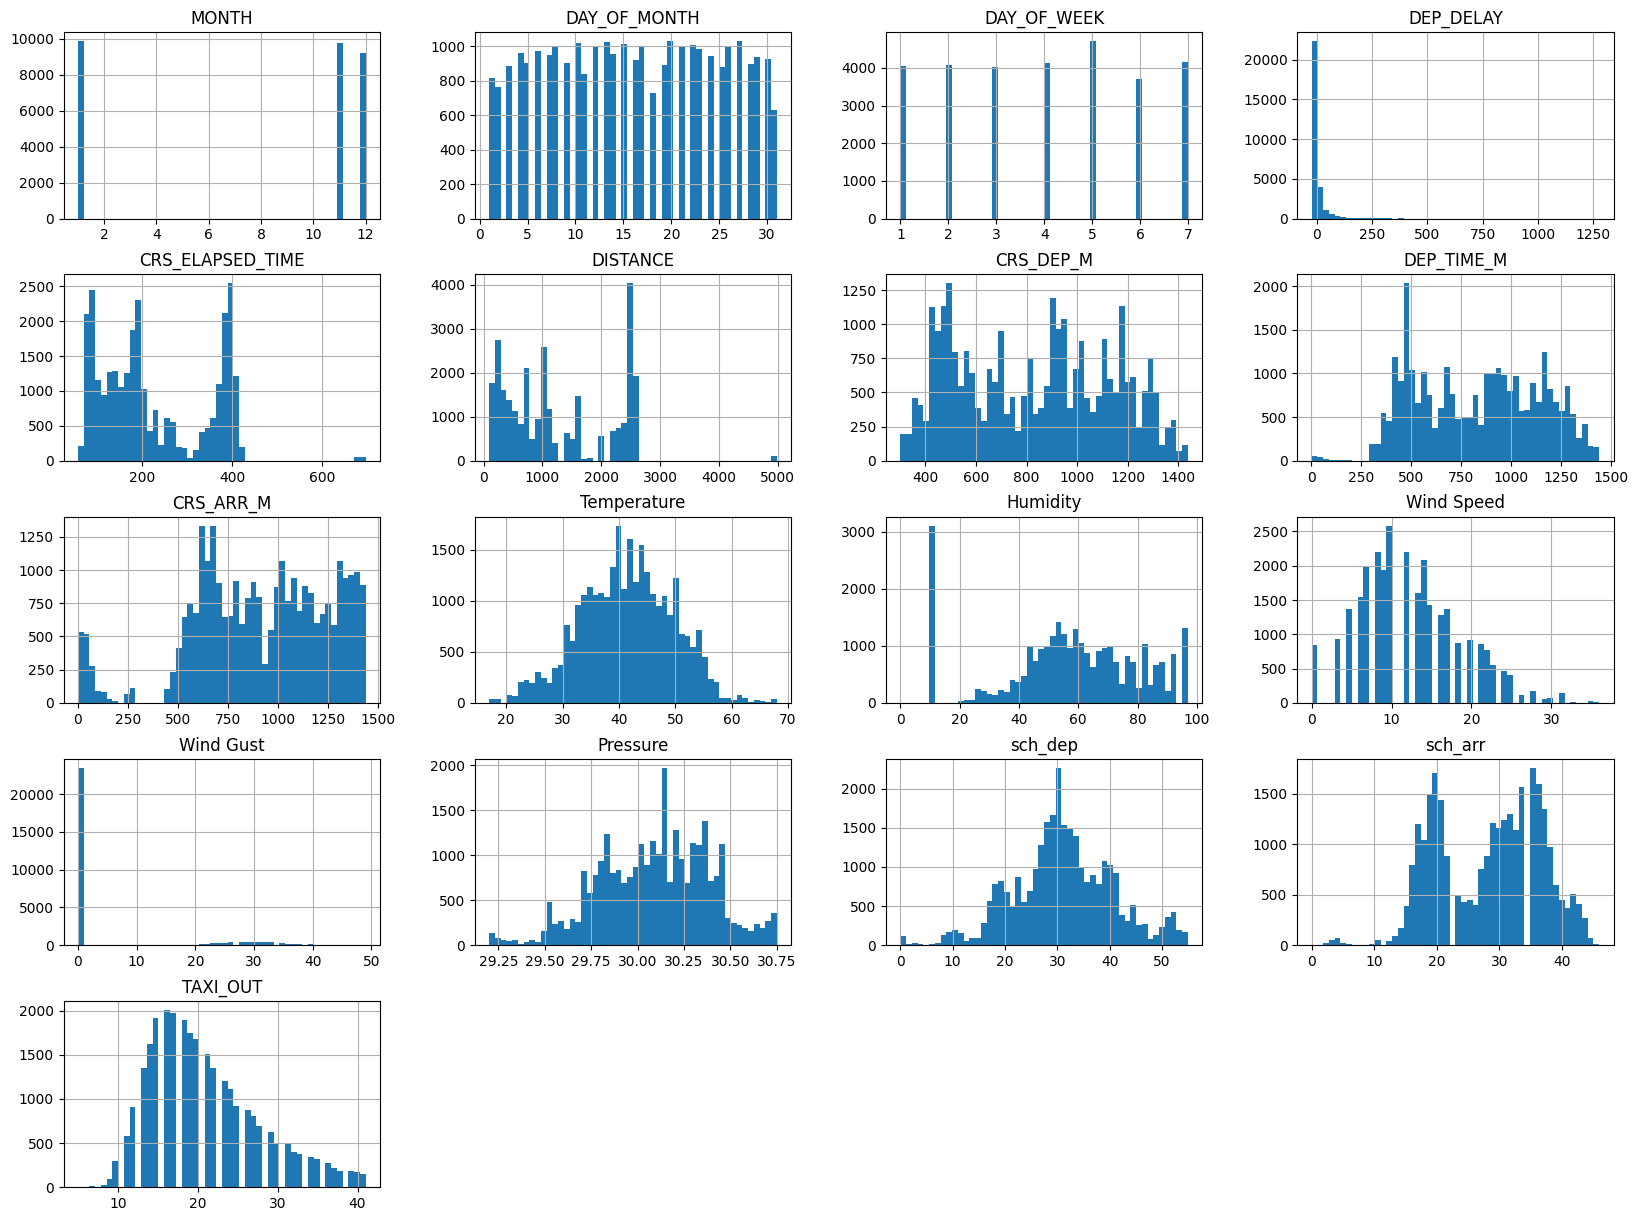

In [1018]:
data.hist(bins=50, figsize=(20, 15))
plt.show

Text(0.5, 0, 'Departure delay times')

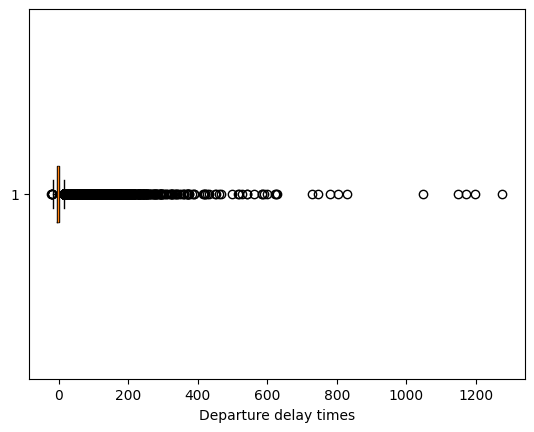

In [1019]:
plt.boxplot(x= data["DEP_DELAY"], vert= False)
plt.ylabel("")
plt.xlabel("Departure delay times")

In [1020]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<Axes: >

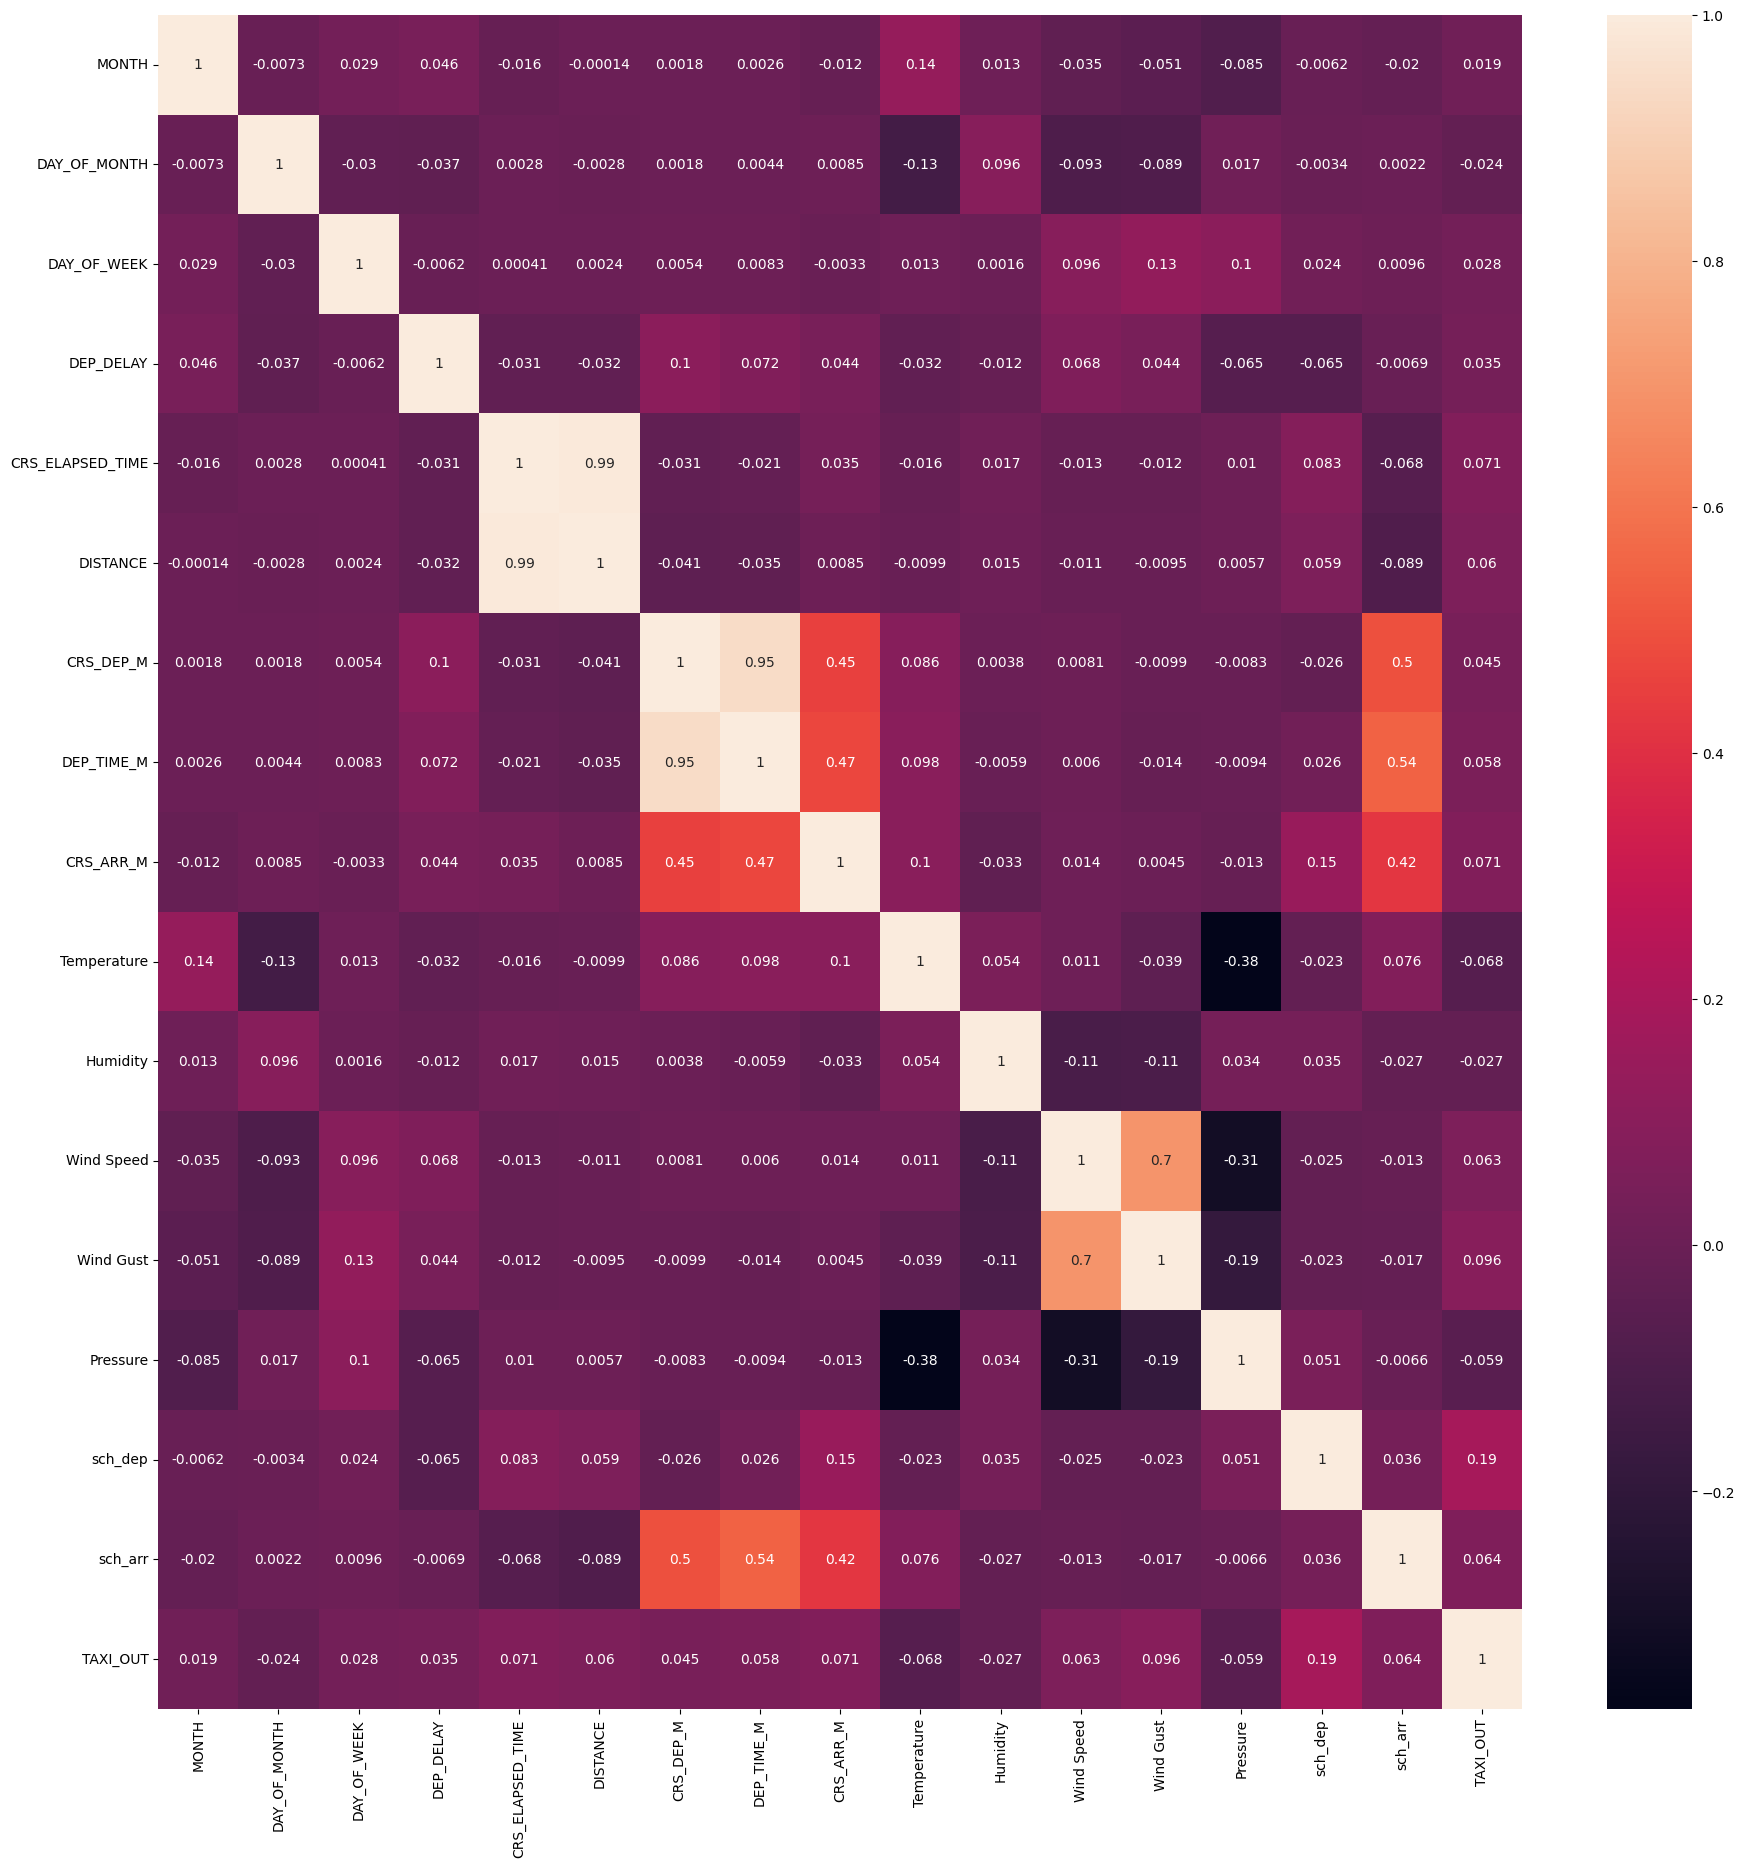

In [1021]:
plt.figure(figsize=(22,22))
sns.heatmap(corr_mat, annot=True)

In [1022]:
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [1023]:
data = data.dropna()
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [1024]:
data = data.drop(columns = ["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "DEST", "OP_UNIQUE_CARRIER", "TAIL_NUM", "sch_dep", "sch_arr","CRS_ELAPSED_TIME", "CRS_DEP_M", "DEP_TIME_M", "CRS_ARR_M", "Wind", "Condition"])
data

,DEP_DELAY,DISTANCE,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,TAXI_OUT
0,-1,636,48,34,58,25,38,29.86,14
1,-7,2475,48,34,58,25,38,29.86,15
2,40,1069,48,34,58,25,38,29.86,22
3,-2,944,48,34,58,25,38,29.86,12
4,-4,760,46,32,58,24,35,29.91,13
...,...,...,...,...,...,...,...,...,...
28815,2,150,39,38,96,6,0,30.18,19
28816,2,187,39,38,96,6,0,30.18,22
28817,283,2422,39,38,96,6,0,30.18,21
28818,5,1598,39,38,96,6,0,30.18,13


In [1025]:
y = data.iloc[:,-1]
X = data.iloc[:,0:-1]

X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size=0.7, random_state=32)

In [1026]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [1027]:
y_pred = lin_reg.predict(X_test)

In [1028]:
result_log = {"Actual": y_test, "Pred": y_pred}
output = pd.DataFrame(result_log)
output

,Actual,Pred
9360,21,21.150730
20390,19,22.463048
16151,17,20.811577
26927,19,20.843228
2007,20,19.147997
...,...,...
23574,26,18.960999
3772,19,23.380563
18485,28,22.372390
15043,22,22.368636


In [1029]:
print('R2:', metrics.r2_score(y_test, y_pred))
# This is an extremely low R squared score showing a poor fit for the model

R2: 0.035229832101808745


In [1030]:
print("Coefficients: \n", lin_reg.coef_)

Coefficients: 
 [ 3.01898151e-03  4.30429210e-04 -1.92737224e-01  1.12336019e-01
 -1.35069157e-02  1.92937390e-02  6.07650653e-02 -4.52555623e-01]


In [1031]:
y = data.iloc[:,0]
X = data.iloc[:,2]

X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size=0.7, random_state=32)

In [1032]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

print(results.params)
C = results.params['const']
C


const          11.947984
Temperature    -0.132285
dtype: float64


11.947983593686358

In [1033]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              DEP_DELAY   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     14.79
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           0.000120
Time:                        01:01:42   Log-Likelihood:            -1.0263e+05
No. Observations:               20172   AIC:                         2.053e+05
Df Residuals:                   20170   BIC:                         2.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.9480      1.454      8.217      

In [1034]:
y_pred = results.predict(sm.add_constant(X_test))
y_pred

9360     7.053428
20390    6.656572
16151    6.656572
26927    5.730575
2007     4.672293
           ...   
23574    5.201434
3772     7.582569
18485    6.392001
15043    8.508566
19143    6.921143
Length: 8646, dtype: float64

In [1035]:
y_train.describe()

count    20172.000000
mean         6.457416
std         39.210912
min        -20.000000
25%         -6.000000
50%         -3.000000
75%          2.000000
max       1276.000000
Name: DEP_DELAY, dtype: float64

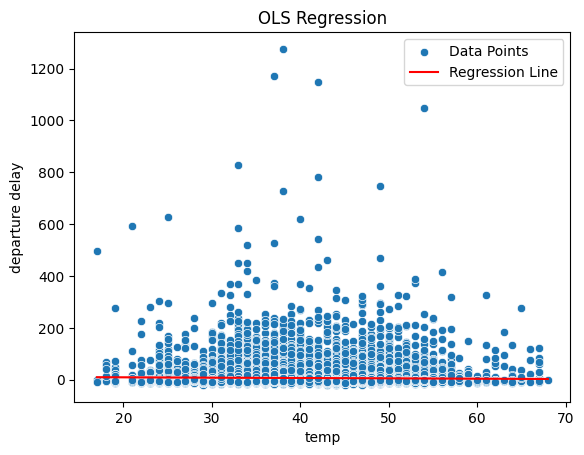

In [1036]:
sns.scatterplot(x = X_train, y=  y_train, label="Data Points")
sns.lineplot(x=X_test, y=y_pred, color='red', label="Regression Line")

plt.xlabel("temp")
plt.ylabel("departure delay")
plt.title("OLS Regression")
plt.legend()
plt.show()

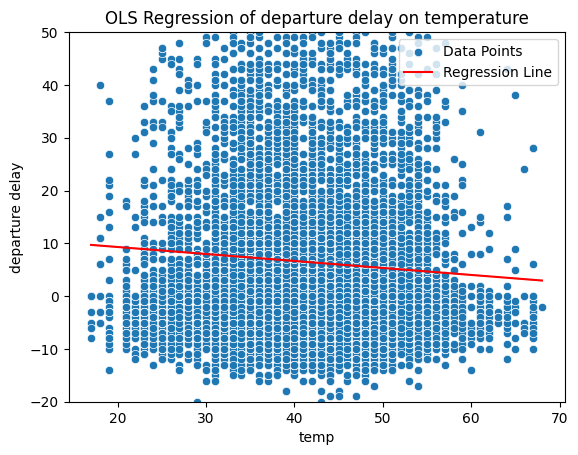

In [1038]:
sns.scatterplot(x = X_train, y=  y_train, label="Data Points")
sns.lineplot(x=X_test, y=y_pred, color='red', label="Regression Line")

plt.xlabel("temp")
plt.ylabel("departure delay")
plt.ylim(top = 50, bottom = -20)
plt.title("OLS Regression of departure delay on temperature")
plt.legend()
plt.show()